In [2]:
# Import Basic Library.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# import library to generate profile reports.
import pandas_profiling

# import zscore library to treat Outlier.
from scipy.stats import zscore

# import sklearn libraires for preprocessing and model evaluation.
from sklearn. preprocessing  import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest,RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier

# import Sklearn metrics to evaluate the performance of the Machine learning models.
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,f1_score,roc_auc_score

#import randint and uniform to generate the random numbers within specified ranges.
from scipy.stats import randint, uniform

In [3]:
# Load the Train dataset
train_data = pd.read_excel('train.xlsx')
train_data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0,no,NaN,1
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0,no,NaN,2
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0,no,NaN,3
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no,NaN,4
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,NaN,5


In [4]:
# Display the bottom five rows. 
train_data.tail()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
8233,55.0,retired,married,high.school,no,yes,no,cellular,oct,thu,...,-3.4,92.431,-26.9,0.722,5017.5,0.233333,0,yes,203.0,8234
8234,41.0,admin.,divorced,high.school,no,no,no,telephone,jun,mon,...,1.4,94.465,-41.8,4.960,5228.1,999.000000,0,yes,188.0,8235
8235,32.0,self-employed,single,university.degree,no,no,no,cellular,apr,thu,...,-1.8,93.075,-47.1,1.435,5099.1,999.000000,0,yes,208.0,8236
8236,NaN,housemaid,married,university.degree,no,no,no,cellular,jun,tue,...,-2.9,92.963,-40.8,1.099,5076.2,999.000000,0,yes,129.0,8237
8237,85.0,housemaid,married,NaN,unknown,yes,no,cellular,apr,tue,...,-1.8,93.749,-34.6,0.642,5008.7,999.000000,1,yes,33.0,8238


In [5]:
# Remove the non-related data from the train dataset.
## important feature names provided in problem stattement, hence removing the unwanted columns(Profit, id)

train_data.drop(['profit','id'],axis = 1, inplace = True)

### Exploratory Data Analysis

In [8]:
# Generate the pandas Profiling report on train dataset.
profile = pandas_profiling.ProfileReport(train_data)

# # Save the report to an HTML file
profile.to_file("train_data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# This command is help us to provide all feature names of the train dataset.
train_data.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [9]:
# info command is help us to understand the count and Dtype of train dataset.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         6224 non-null   float64
 1   profession      8238 non-null   object 
 2   marital         8238 non-null   object 
 3   schooling       5832 non-null   object 
 4   default         8238 non-null   object 
 5   housing         8238 non-null   object 
 6   loan            8238 non-null   object 
 7   contact         8238 non-null   object 
 8   month           8238 non-null   object 
 9   day_of_week     7451 non-null   object 
 10  campaign        8238 non-null   int64  
 11  pdays           8238 non-null   int64  
 12  previous        8238 non-null   int64  
 13  poutcome        8238 non-null   object 
 14  emp.var.rate    8238 non-null   float64
 15  cons.price.idx  8238 non-null   float64
 16  cons.conf.idx   8238 non-null   float64
 17  euribor3m       8238 non-null   f

In [10]:
# Display Summary

train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
custAge,6224.0,39.953728,10.540516,18.000,32.000,38.000,47.000,94.000
campaign,8238.0,2.531682,2.709773,1.000,1.000,2.000,3.000,40.000
pdays,8238.0,960.916606,190.695054,0.000,999.000,999.000,999.000,999.000
previous,8238.0,0.183054,0.514209,0.000,0.000,0.000,0.000,6.000
emp.var.rate,8238.0,0.056397,1.566550,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,8238.0,93.570977,0.578782,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,8238.0,-40.577907,4.650101,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,8238.0,3.586929,1.742784,0.634,1.334,4.857,4.961,5.045
nr.employed,8238.0,5165.575965,72.727423,4963.600,5099.100,5191.000,5228.100,5228.100
pmonths,8238.0,960.687436,191.841012,0.000,999.000,999.000,999.000,999.000


### •	Handle duplicates

In [9]:
# Display if there are any duplicate rows in the train_data DataFrame.
train_data.duplicated().any()

True

In [11]:
# Dipslay the duplicated values.
train_data.duplicated().sum()

36

In [12]:
# Drop Duplicated values, which are not required in train dataset.
train_data.drop_duplicates(inplace=True)

### •	Handle missing values

In [13]:
# check whether the training dataset are having any missing values.

train_data.isnull().sum()

custAge           1999
profession           0
marital              0
schooling         2393
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week        784
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

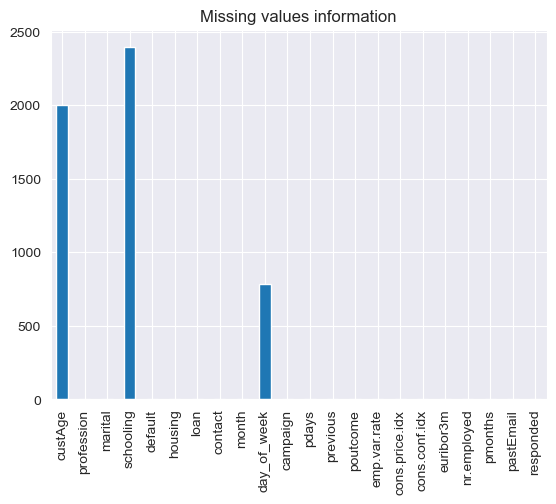

In [14]:
# Display the missing value through bar chart.

sns.set_style(style='darkgrid')
train_data.isnull().sum().plot(kind='bar')
plt.title('Missing values information')
plt.show()


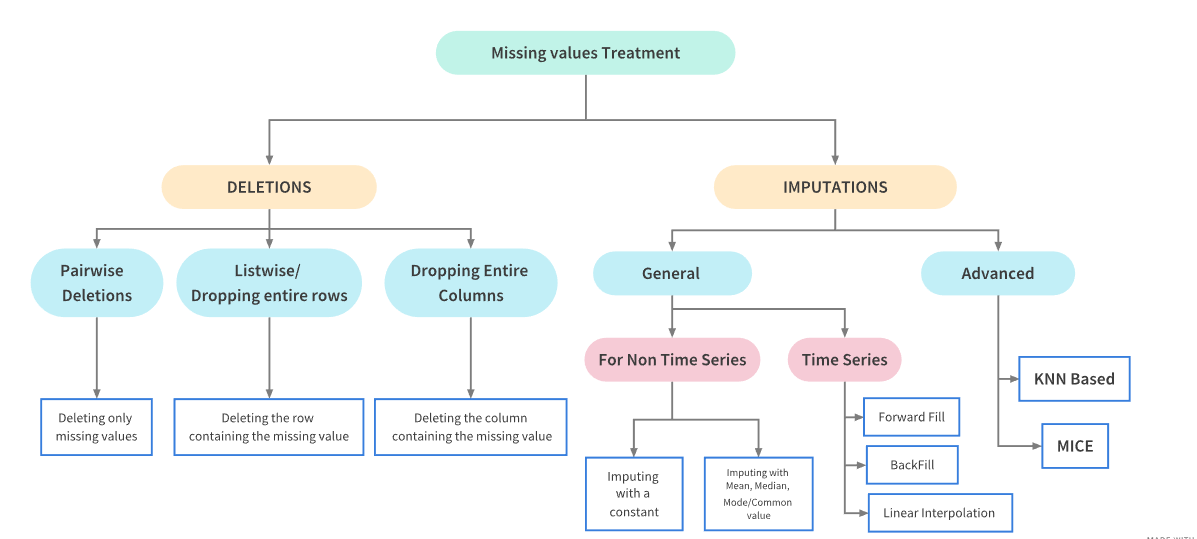

In [15]:
# Null values treatement.
## Treating the null with imputation , as the problem statement is a time series.
## we are using forward fill method to fill the Null values
train_data['custAge'].fillna(method='ffill', inplace=True)  
train_data['schooling'].fillna(method='ffill',inplace = True)
train_data['day_of_week'].fillna(method='ffill',inplace = True)

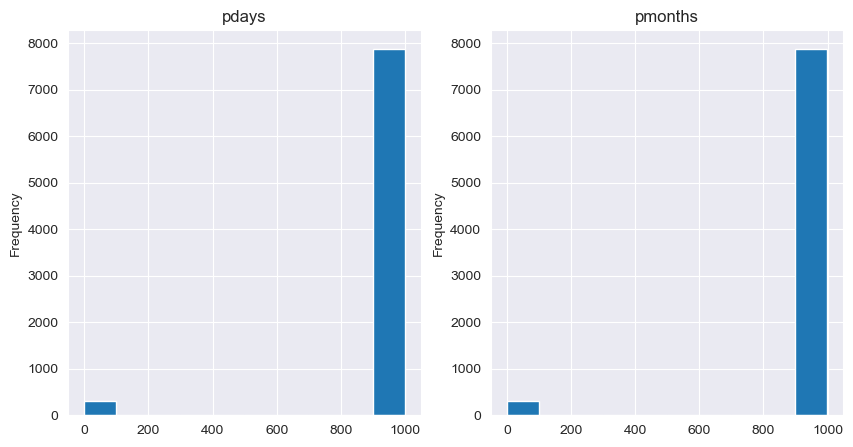

In [16]:

plt.figure(figsize=(10,5))
# Creating a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)  # Subplot 1
train_data['pdays'].plot(kind='hist')
plt.title('pdays')

plt.subplot(1, 2, 2)  # Subplot 2
train_data['pmonths'].plot(kind='hist')
plt.title('pmonths')

plt.show()


<b> Observation : </b> : from the above charts we can say that 999 is creating a hug outlier. 
        # let's repalce the value 999 with -1
        

In [18]:
# Replace 999 with -1
## Replacing '999' with -1 as 999 can be considered as outlier and effect the analyis
train_data['pdays'] =train_data['pdays'].replace(999, -1)
train_data['pmonths'] =train_data['pmonths'].replace(999, -1)

In [17]:
train_data[['pdays','pmonths']].value_counts()

pdays  pmonths   
999    999.000000    7886
6      0.200000        90
3      0.100000        86
4      0.133333        25
9      0.300000        17
7      0.233333        16
2      0.066667        13
12     0.400000        12
10     0.333333         8
5      0.166667         7
13     0.433333         6
14     0.466667         6
15     0.500000         5
11     0.366667         5
1      0.033333         4
16     0.533333         4
8      0.266667         3
0      0.000000         3
17     0.566667         2
19     0.633333         1
21     0.700000         1
22     0.733333         1
25     0.833333         1
Name: count, dtype: int64

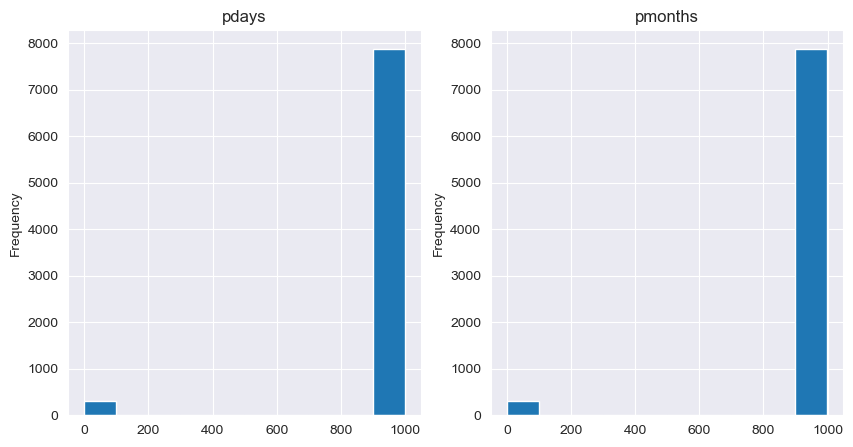

In [18]:

plt.figure(figsize=(10,5))
# Creating a subplot with 1 row and 2 columns
plt.subplot(1, 2, 1)  # Subplot 1
train_data['pdays'].plot(kind='hist')
plt.title('pdays')

plt.subplot(1, 2, 2)  # Subplot 2
train_data['pmonths'].plot(kind='hist')
plt.title('pmonths')

plt.show()


In [20]:
# Display the Null value after imputation.
train_data.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

The training dataset is cleaned, we can go head with further steps

### Handle outliers

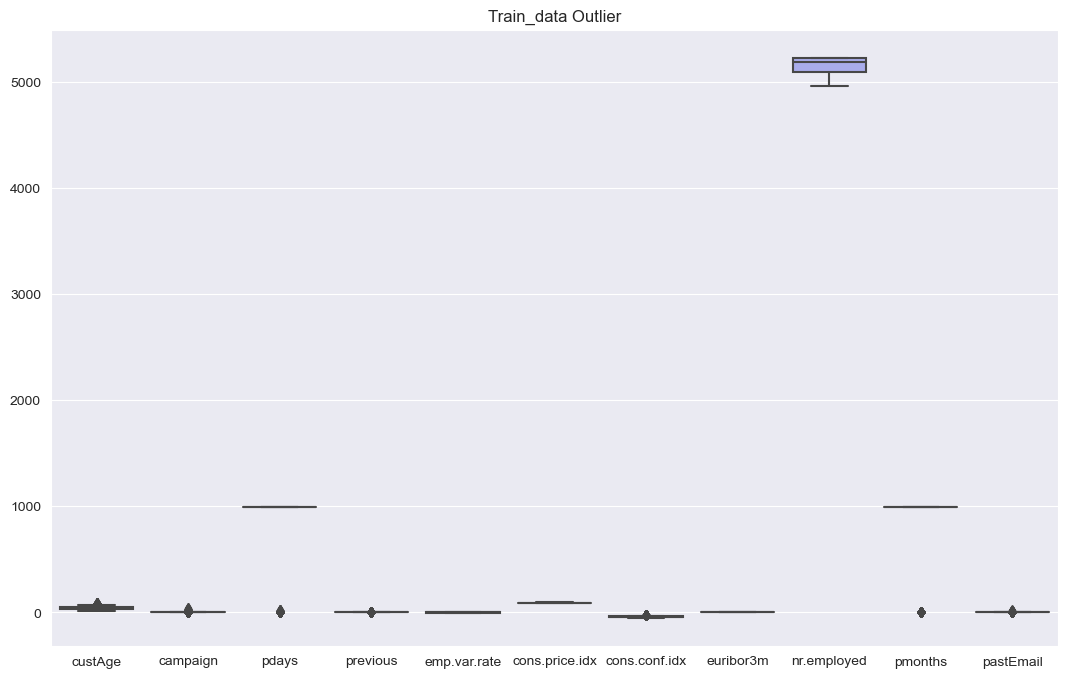

In [21]:
# Display outlier with box plot.
plt.figure(figsize=(13,8))
sns.boxplot(train_data)
plt.title('Train_data Outlier')
plt.show()

#### From the above chart we could not able to identify the ouliters, let try to check with code

In [22]:
train_data.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

<Axes: >

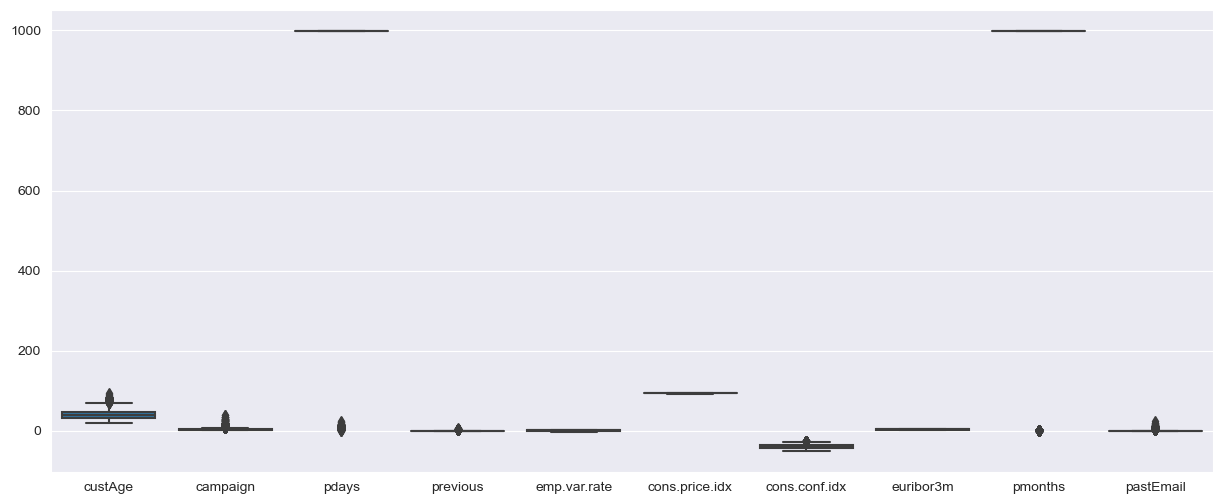

In [23]:
plt.figure(figsize=(15,6))
sns.boxplot(train_data[['custAge','campaign','pdays', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx',
                 'euribor3m','pmonths','pastEmail']])

###  Finding outliers using Z_score

In [24]:
train_data.head(1)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,0,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,999.0,0,no


In [25]:
z_score = train_data[['custAge','campaign','pdays','pastEmail']].apply(zscore)
Z_score_threshhold = 3 # threshhold  

# identify Outliers 
outliers = (z_score.abs() > Z_score_threshhold)

In [26]:
# lets check the count of Outliers 
Outlier_counts = outliers.sum()
print(f'Count of Outliers :\n{Outlier_counts} ')

print("The above are the outliers which are need to be removed from the trained data.")

Count of Outliers :
custAge       85
campaign     164
pdays        316
pastEmail    141
dtype: int64 
The above are the outliers which are need to be removed from the trained data.


### Outlier treatment

In [27]:
# Identify the Outliers 

Ouliers_ = (z_score > Z_score_threshhold).any(axis =1 )

cleaned_data_ = train_data[~Ouliers_]

cleaned_data_.shape

(7823, 22)

## seems to be like Outliers have been removed from the dataset

In [30]:
# Generate the pandas Profiling report on cleanded dataset.

profile = pandas_profiling.ProfileReport(cleaned_data_)

profile.to_file("cleaned_data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

###### TO Perform better EDA, let's separate the Numercial and categorical varibale to 

In [31]:
# Separating the Numerical and Categorical variables
## Using user defined function:

def data_type(dataset):
    ''' This funciton is used to separate the numerical and categorical variables
    '''
    Numerical = []
    Categorical = []
    
    for i in dataset.columns:
        if dataset[i].dtypes == 'int64' or dataset[i].dtypes == 'float64':
            Numerical.append(i)
        else:
            Categorical.append(i)
    return Numerical,Categorical

In [32]:
#Separate the numercial and categorical.
numerical, categorical = data_type(cleaned_data_)

In [33]:
#Display the categorical variables
categorical

['profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'responded']

### Data Visulization

In [33]:
# set up default figure size for all plots.
plt.rcParams['figure.figsize'] = (13, 5)  

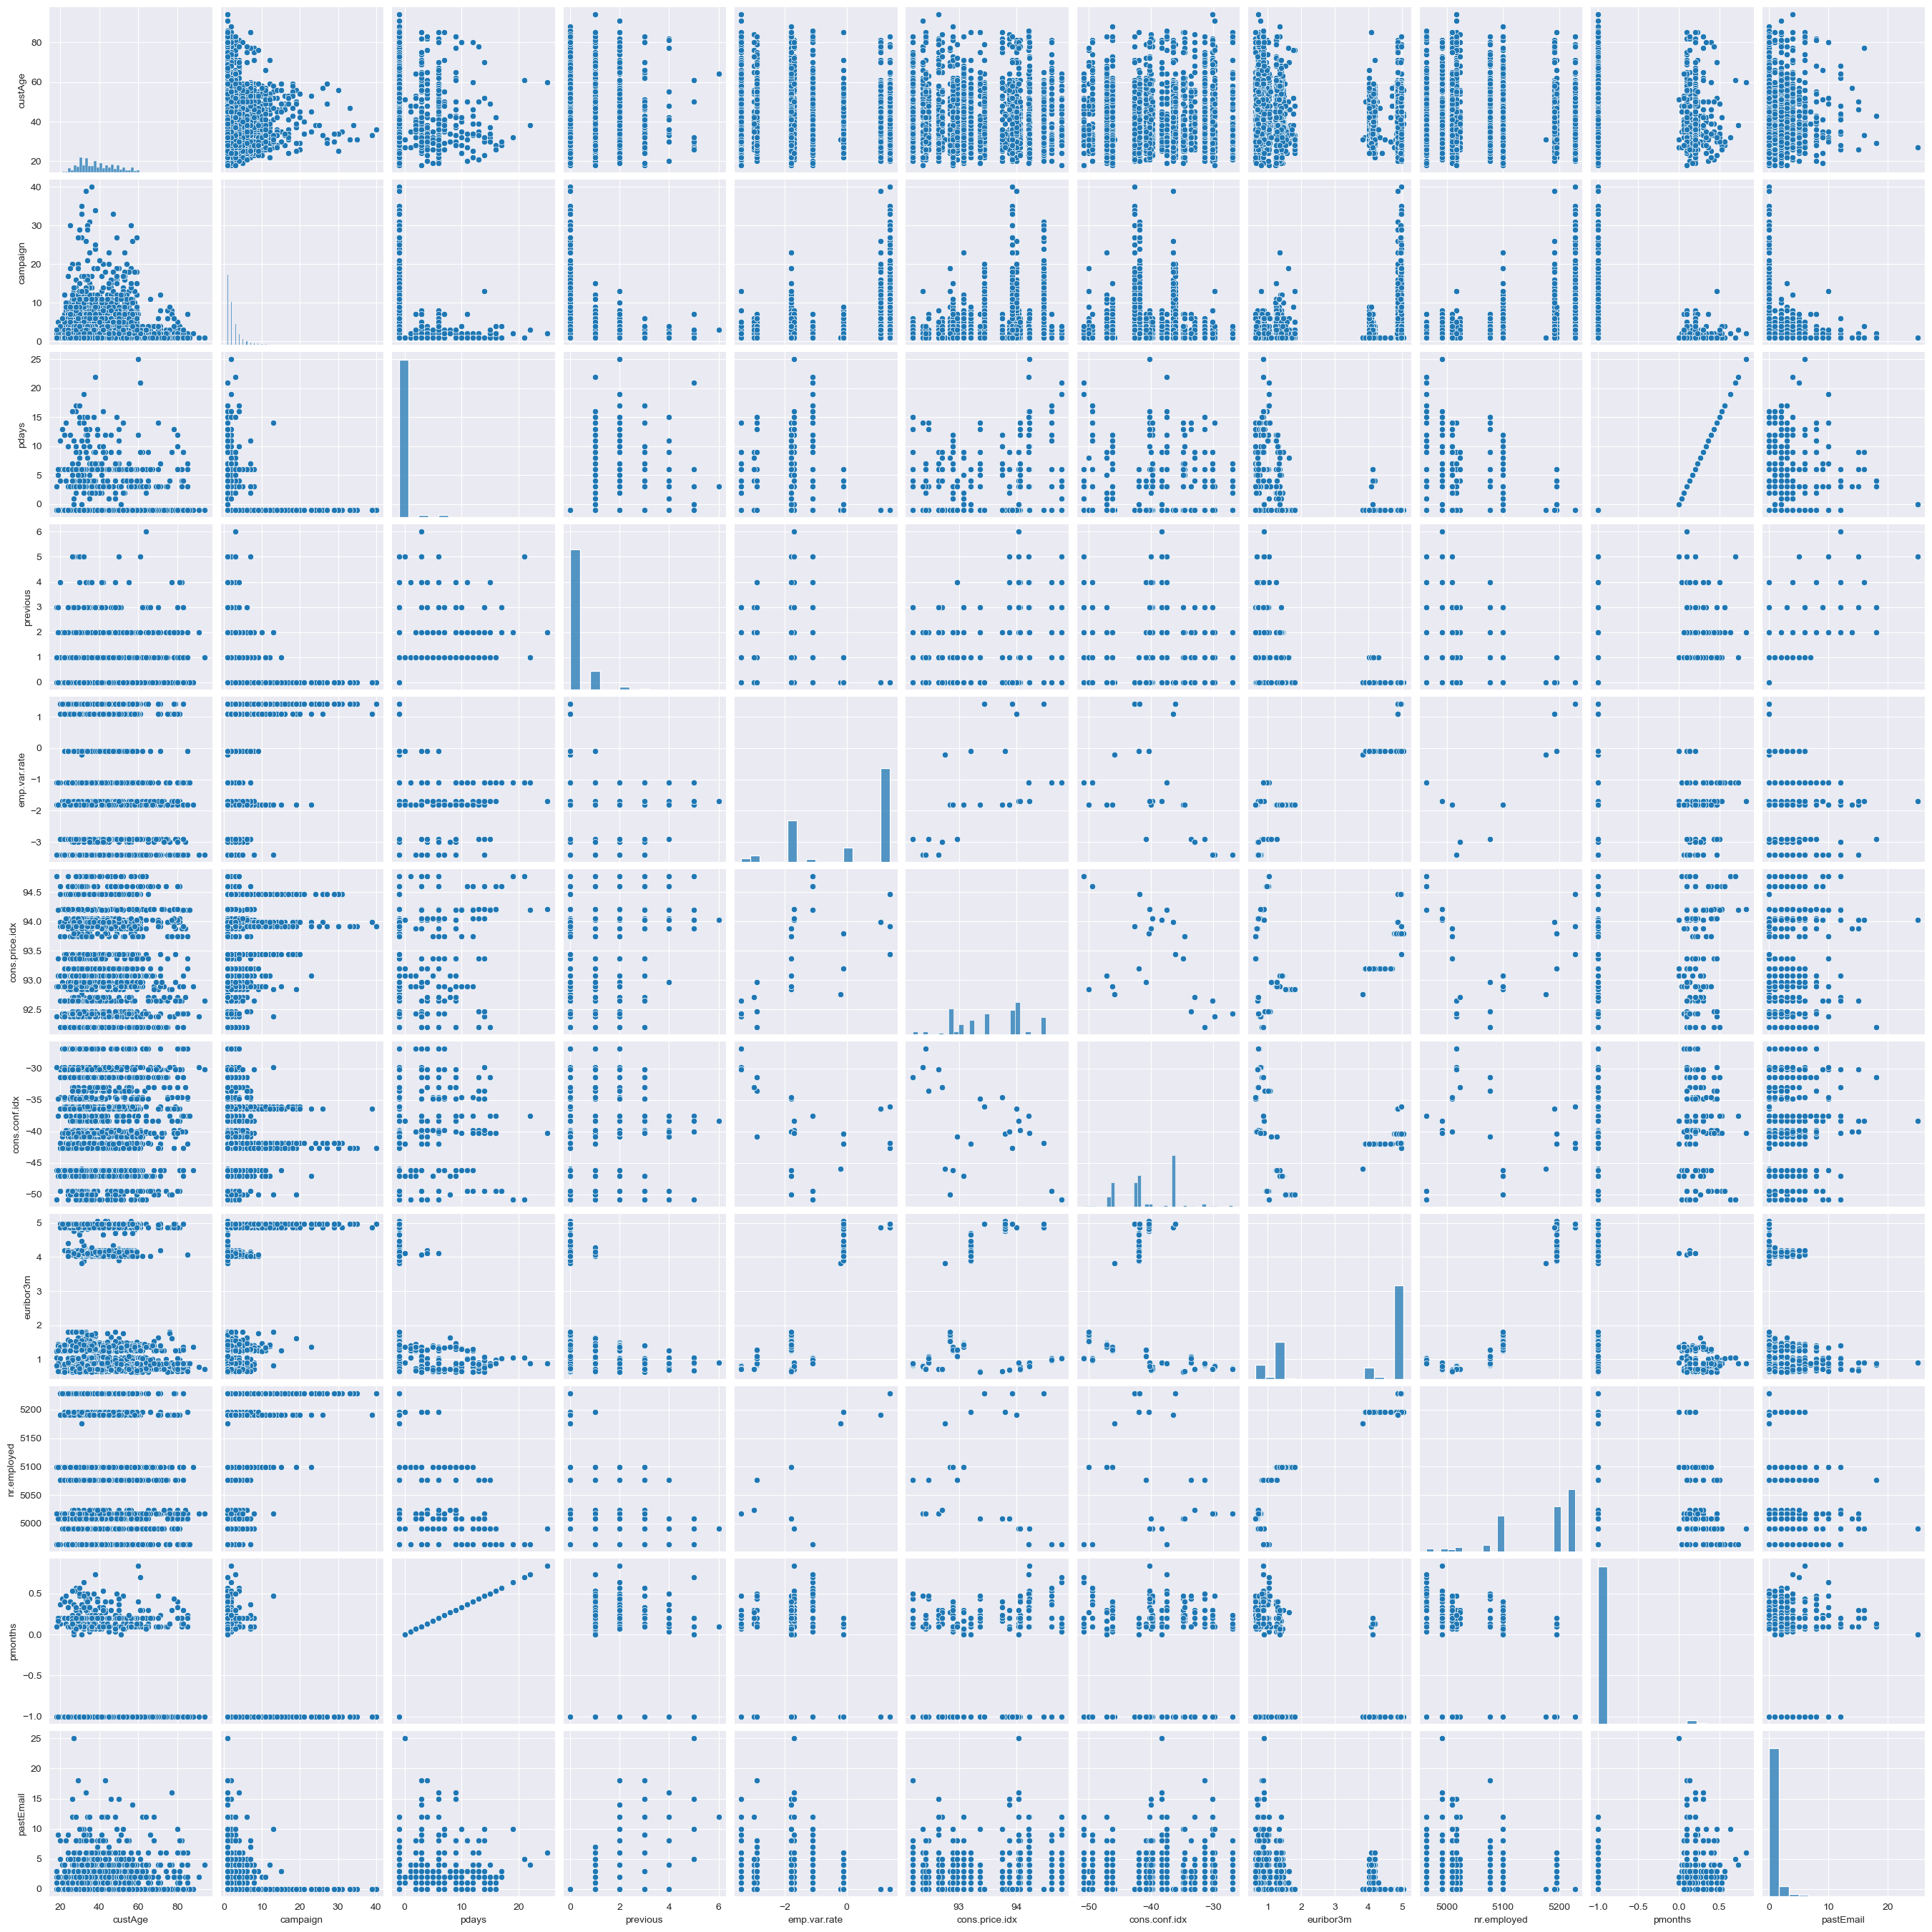

In [34]:
# Display a pair plot for the specified numerical columns.
sns.pairplot(train_data[numerical])

<b> Observation:</b> Based on the above pairplot, it can be concluded that there is no significant pattern or outcome that can be easily predicted from the visual analysis of variable relationships.

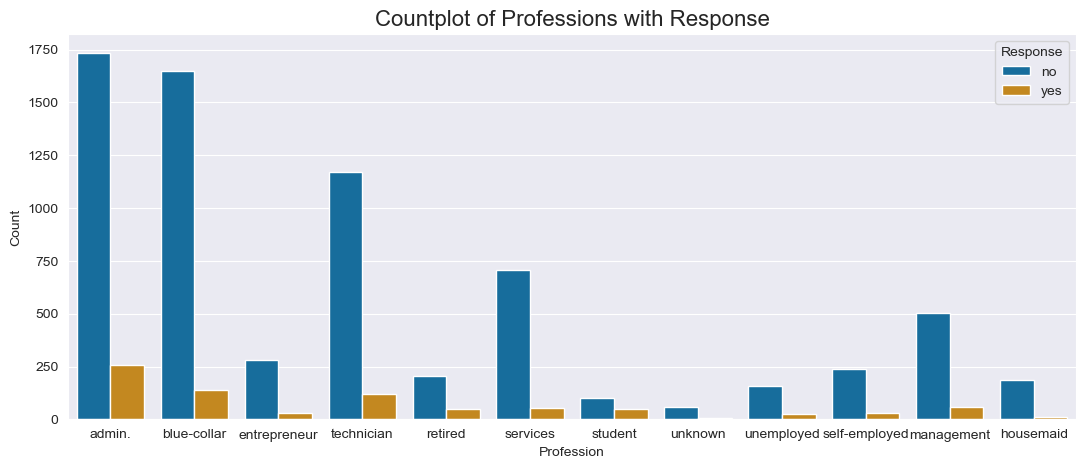

In [39]:

## This code sets the default figure size for all subsequent plots by updating the rcParams dictionary before creating the Seaborn countplot.
plt.rcParams['figure.figsize'] = (13, 5) 
sns.countplot(data=cleaned_data_, x='profession', hue='responded', palette='colorblind')
plt.title('Countplot of Professions with Response', fontsize=16)  
plt.xlabel('Profession' )  
plt.ylabel('Count')  
plt.legend(title='Response')  
plt.show()


<b>Observation : </b> From the above chart, it can be inferred that individuals in professions such as admins, blue-collar workers, and technicians have responded

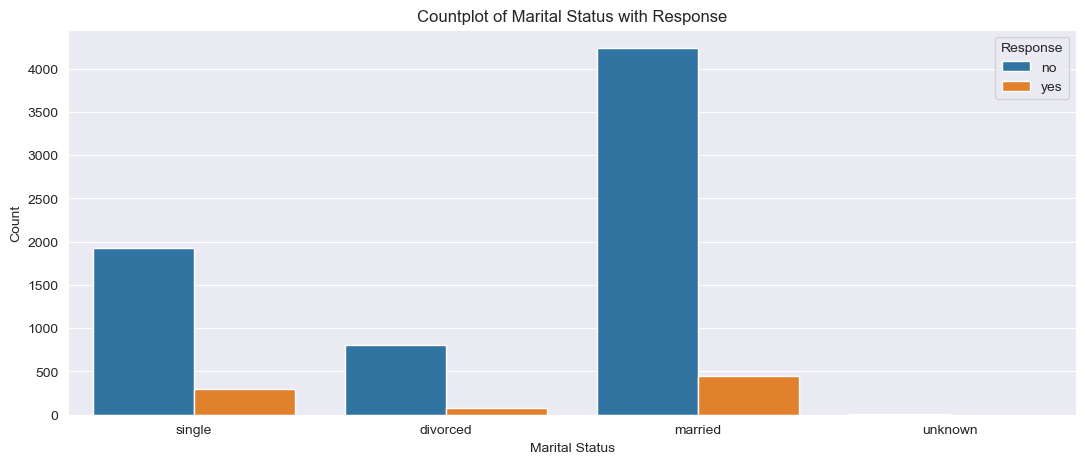

In [38]:
# Countplot of Marital with Response
sns.countplot(data=cleaned_data_, x='marital', hue='responded')
plt.title('Countplot of Marital Status with Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

<b>Observation : </b> Based on the chart above, it is evident that individuals with a marital status of 'married' have responded

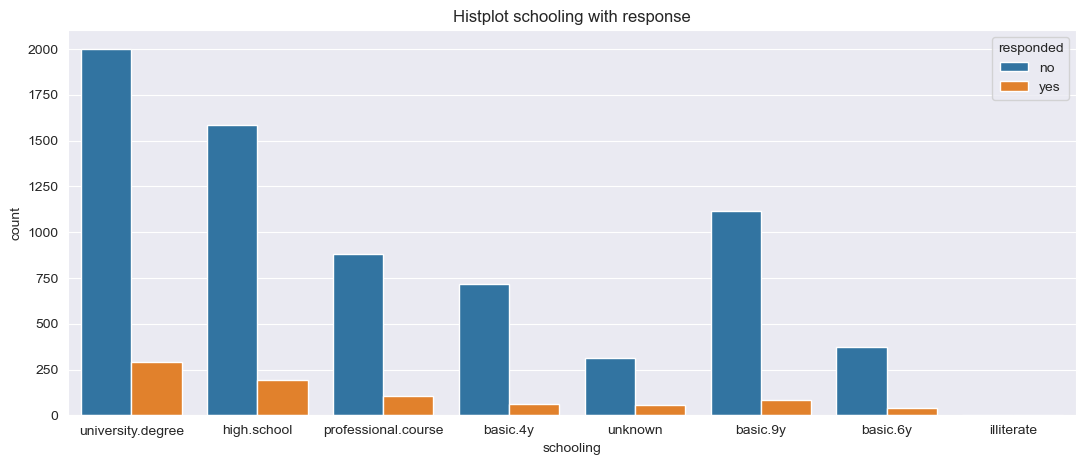

In [41]:
# Histplot schooling with response
sns.countplot(data = cleaned_data_,x=cleaned_data_['schooling'],hue=cleaned_data_['responded'])
plt.title('Histplot schooling with response')
plt.show()

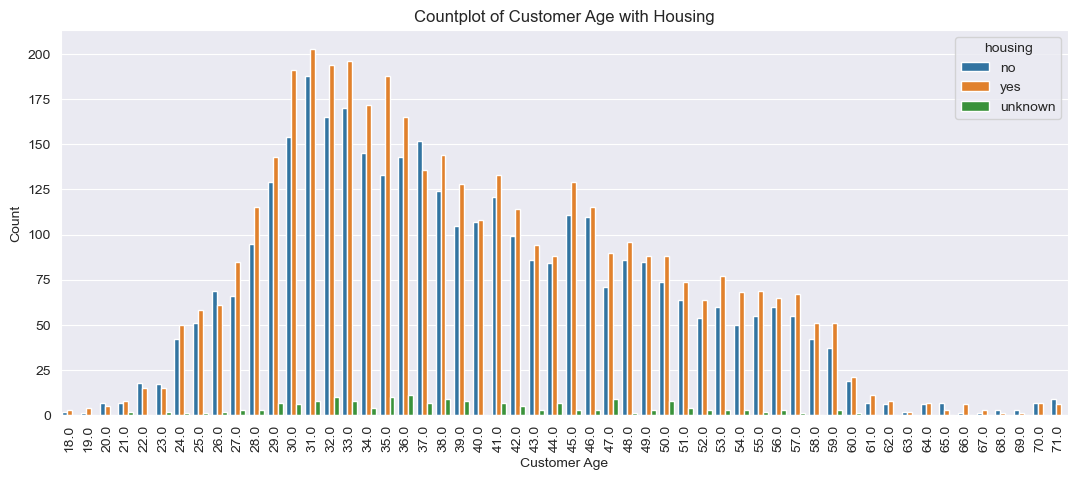

In [42]:
sns.countplot(data=cleaned_data_, x='custAge', hue='housing')
plt.title('Countplot of Customer Age with Housing')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

<b>Observation:</b> Based on the above chart, we can conclude that customers are interested in taking housing loans between the ages of 24 and 59.

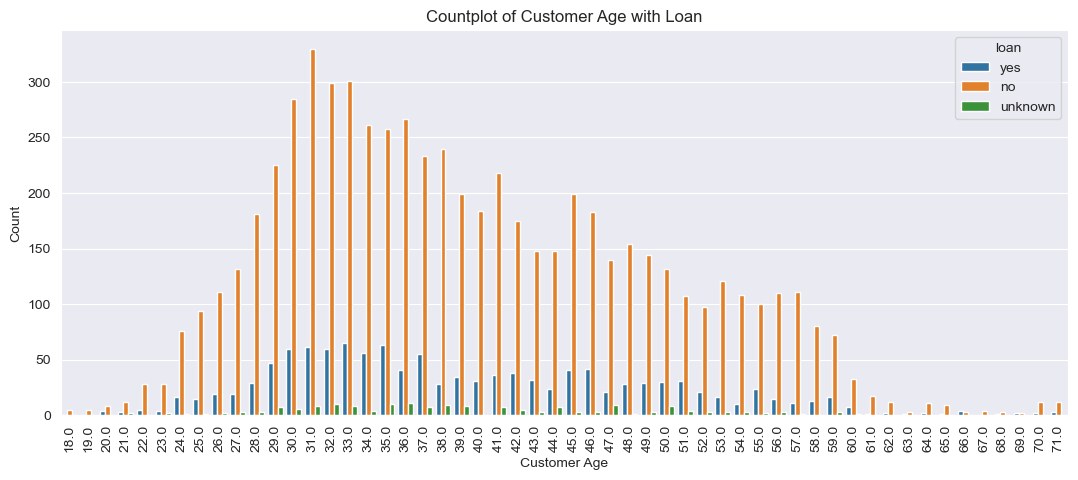

In [43]:
# Countplot of Customer Age with Loan'
sns.countplot(data=cleaned_data_, x='custAge', hue='loan')
plt.title('Countplot of Customer Age with Loan')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

<b>Observation:</b> Based on the above chart, we can conclude that customers are interested in taking personal loans between the ages of 29 and 48.

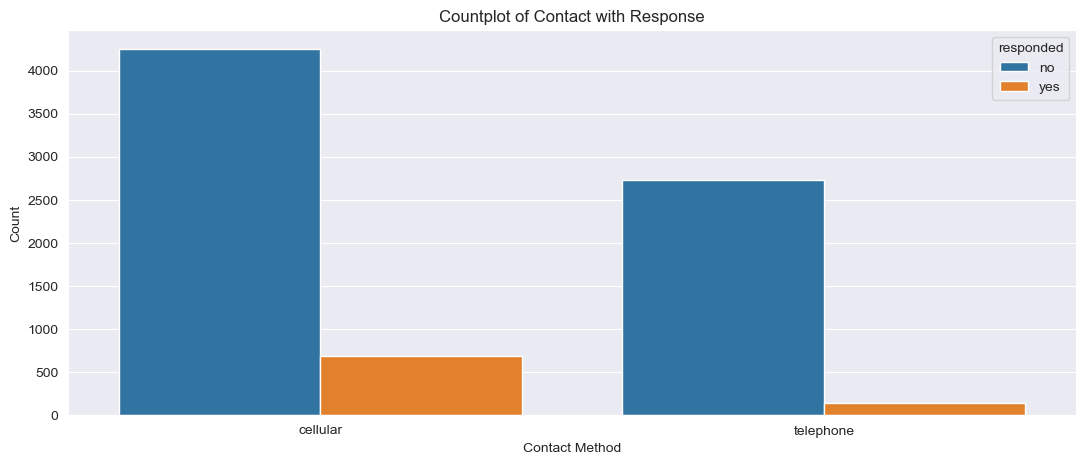

In [44]:
# Countplot of Contact with Response

sns.countplot(data=cleaned_data_, x='contact', hue='responded')
plt.title('Countplot of Contact with Response')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()

<b>Observation</b>: From the above chart, we can conclude that customers are interested in cellular services.

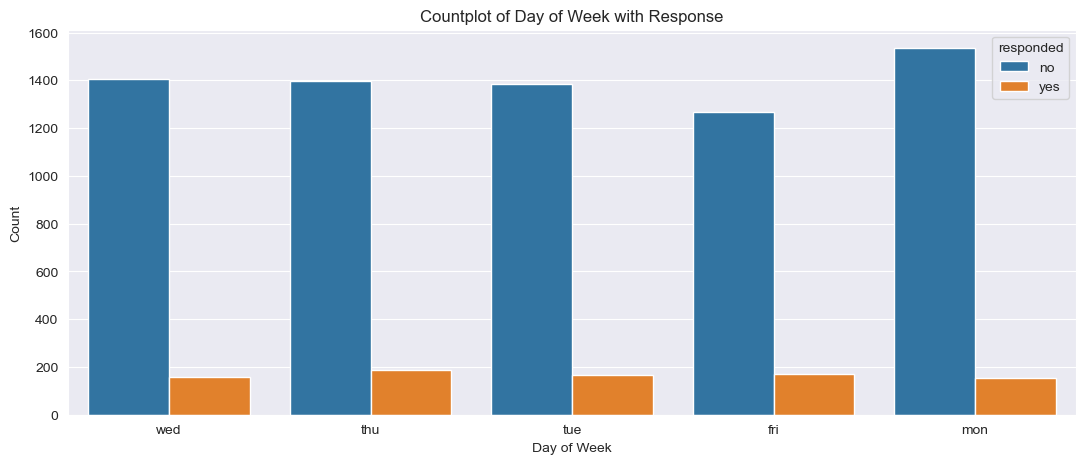

In [45]:
#Countplot of Day of Week with Response.
sns.countplot(data=cleaned_data_, x='day_of_week', hue='responded')
plt.title('Countplot of Day of Week with Response')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

<b>Observation:</b> No discernible pattern in response prediction based on the day of the week is evident from the chart.

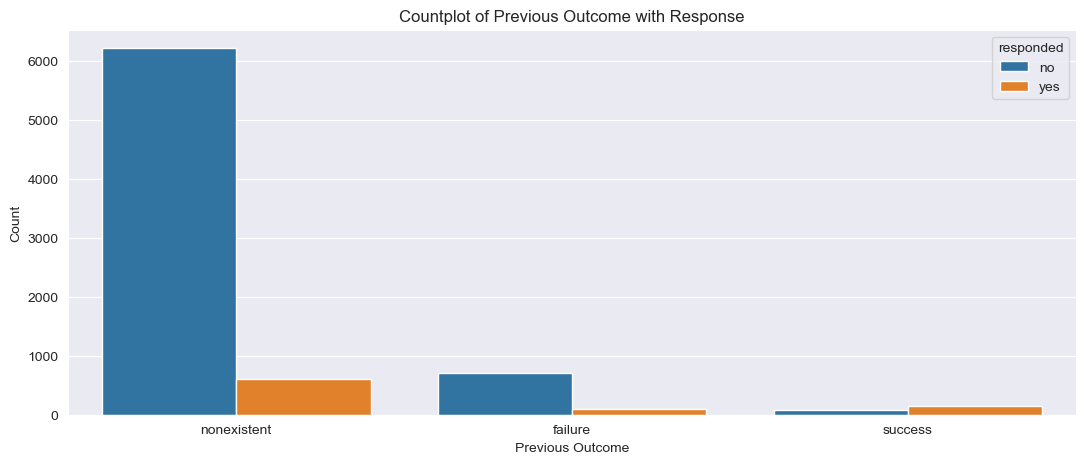

In [46]:
# Countplot of Previous Outcome with Response.
sns.countplot(data=cleaned_data_, x='poutcome', hue='responded')
plt.title('Countplot of Previous Outcome with Response')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.show()

In [47]:
# Display Numerical variables.
numerical

['custAge',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'pmonths',
 'pastEmail']

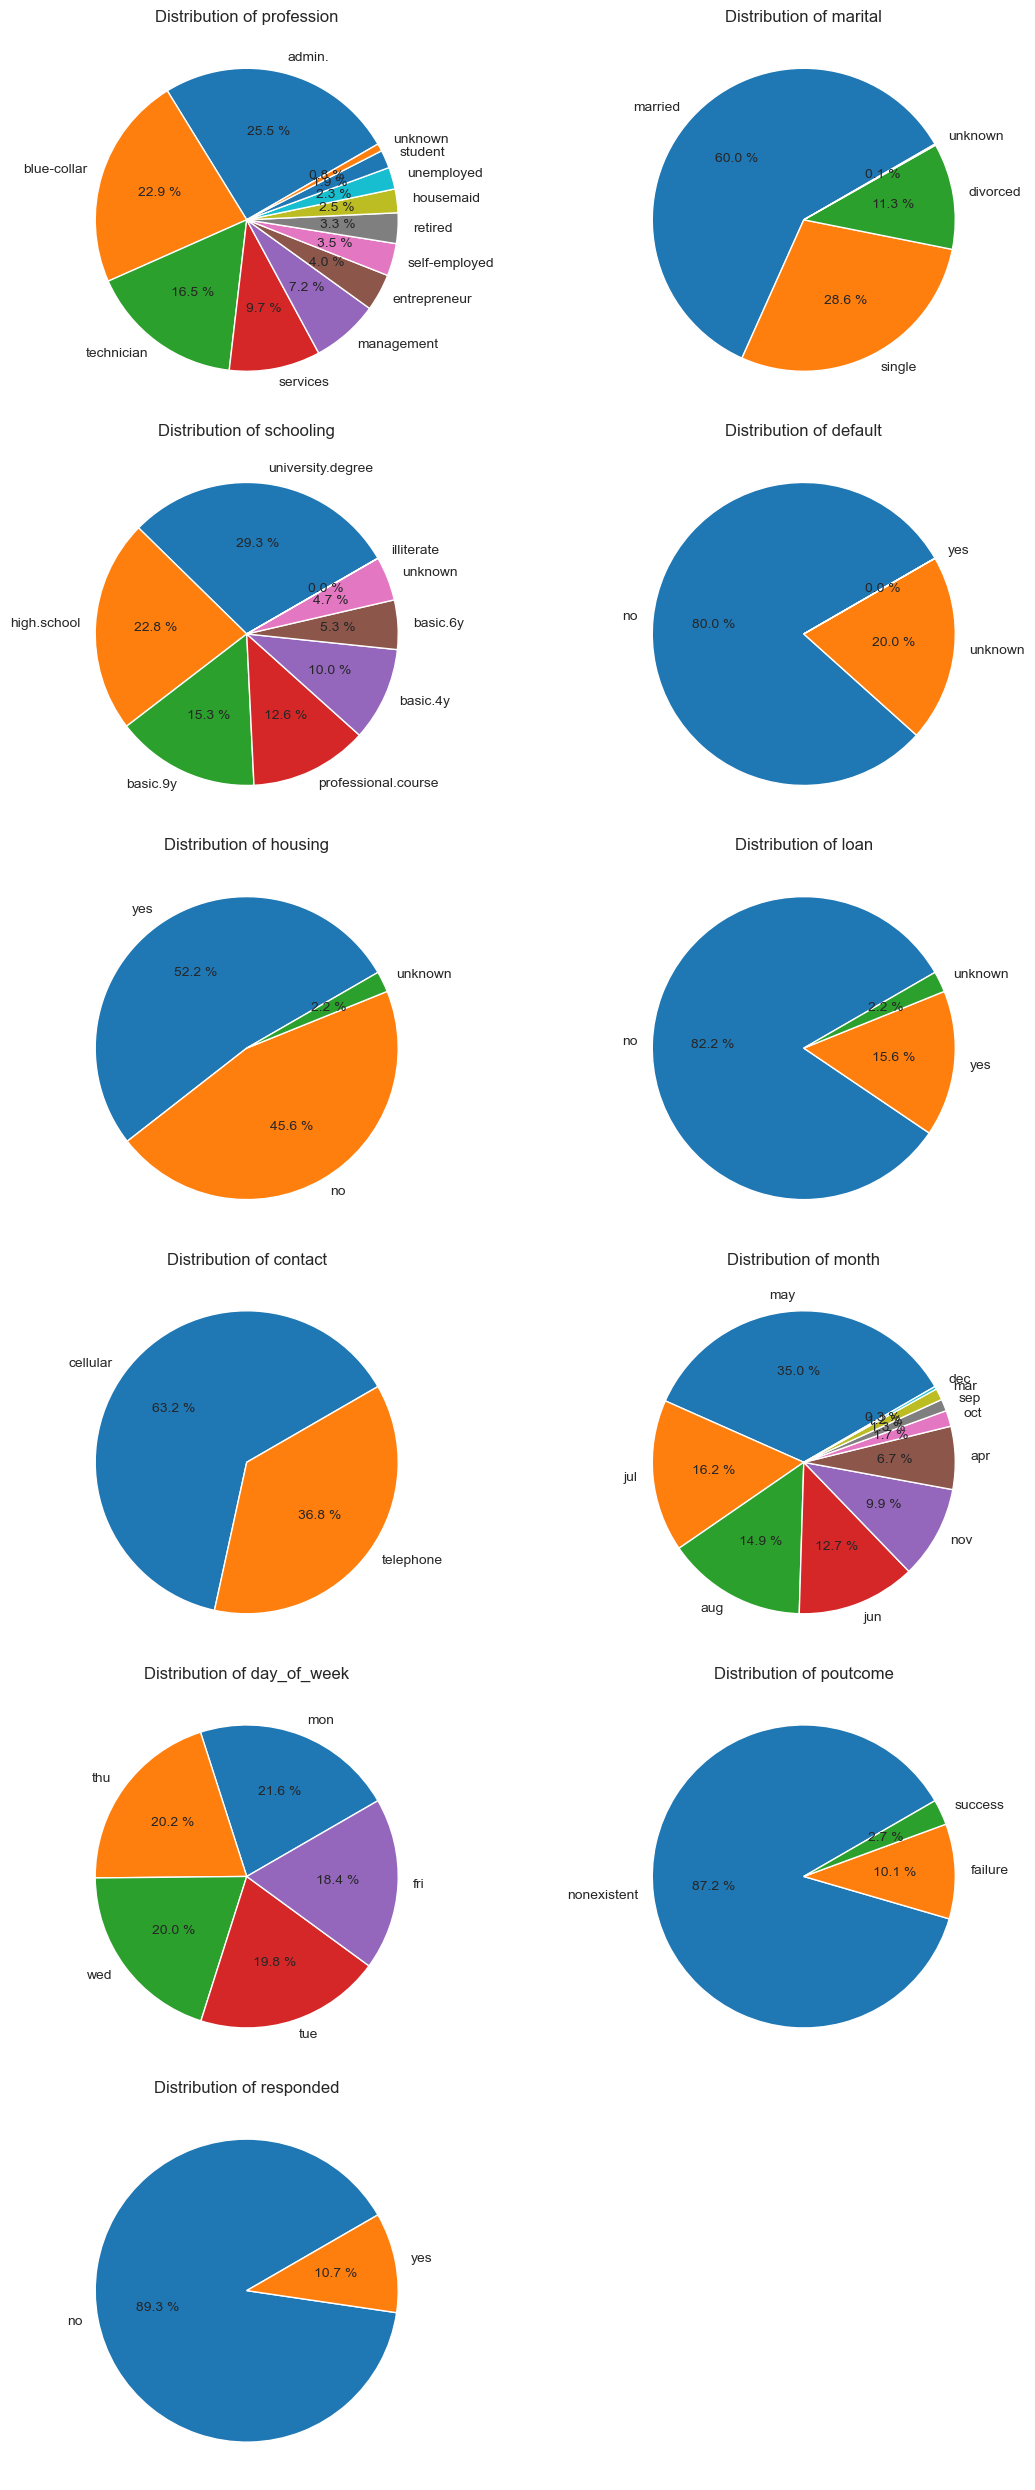

In [48]:
#Lets perform Subplots on Categorical  data.
plt.figure(figsize=(12,25))

for i, column in enumerate(categorical, 1):
    plt.subplot(6, 2, i)
    plt.gca().set_facecolor('red')
    category_counts = cleaned_data_[column].value_counts()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f %%', startangle=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<b>Displayed above is the distribution of all categorical columns in relation to the target column 'responded'.

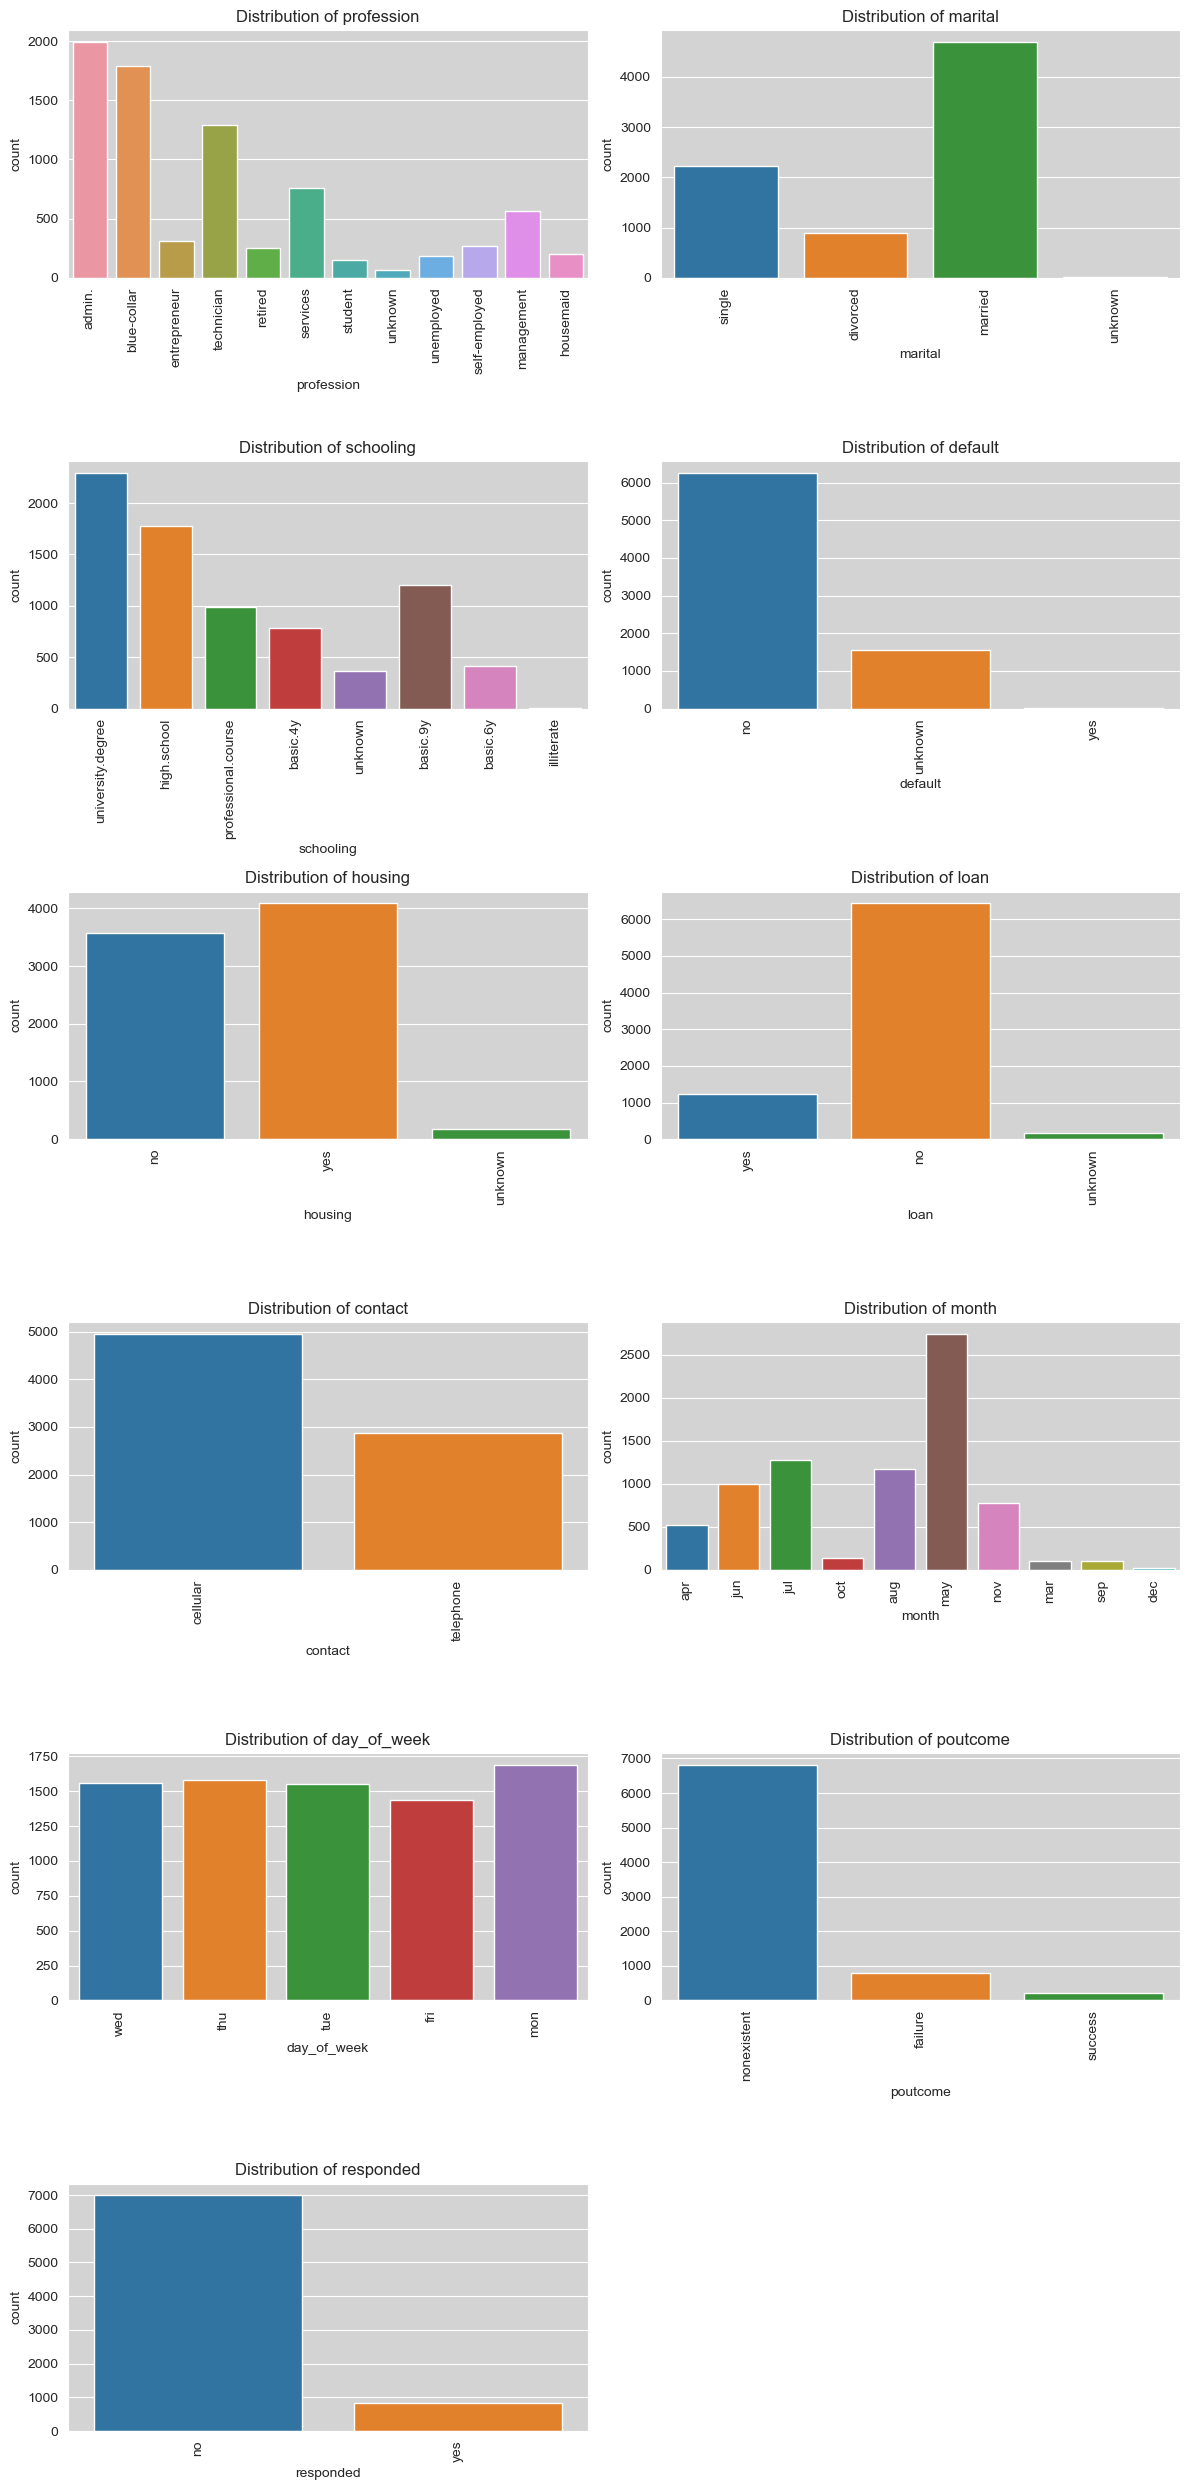

In [49]:
plt.figure(figsize=(12, 25))  # Set the overall figure size

# Loop through each categorical column.
for i, column in enumerate(categorical, 1):
    plt.subplot(6, 2, i)  # Create subplots in a 6x2 grid
    plt.gca().set_facecolor('lightgray')  # Set background color for each subplot
    sns.countplot(x=column, data=cleaned_data_)  # Create a count plot for the current column
    plt.title(f'Distribution of {column}')  # Set subplot title
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<b> - Overall Observation </b>:- 

    1. admin blue-collar and technicaince have responded 
    2. Marital status of 'married' have responded.
    3. Schooling of University_degree, hight school and basic 9y have responded.
    4. Cust Age between 24 to 59 are interested in taking housing loans.
    5. Cust Age between 29 to 48 are interested in taking personal loans.
    6. Customers are interested in cellular services.


In [47]:
# from the above chart we can see the target varible is very imbalanced.
## to clear that lets see the values counts of Responded column.

cleaned_data_['responded'].value_counts()

responded
no     6949
yes     740
Name: count, dtype: int64

<b>Observation :- </b>  The target varible is hightly imbalanced.


### Feature Engineering 

### •	Encode categorical data

In [50]:
# Display top 5 categorical data.
cleaned_data_[categorical].head(5)

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome,responded
0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,nonexistent,no
2,admin.,single,high.school,no,no,no,telephone,jun,thu,nonexistent,no
3,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,nonexistent,no
4,blue-collar,single,university.degree,unknown,yes,no,cellular,jul,tue,nonexistent,no
5,entrepreneur,married,university.degree,no,yes,no,telephone,jun,thu,nonexistent,no


In [52]:
#  convert the categorical data into encoding with the help of label encoder

label_encoder = LabelEncoder()

# encoding label to all categoricals

for col in categorical:
    cleaned_data_[col] =  label_encoder.fit_transform(cleaned_data_[col])
    
# Display cleaned data
cleaned_data_

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,34.0,0,2,6,0,0,2,0,0,4,...,0,1,-1.8,93.075,-47.1,1.498,5099.1,999.000000,0,0
2,31.0,0,2,3,0,0,0,1,4,2,...,0,1,1.4,94.465,-41.8,4.961,5228.1,999.000000,0,0
3,52.0,0,0,6,1,2,0,0,3,3,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.000000,0,0
4,39.0,1,2,6,1,2,0,0,3,3,...,0,1,1.4,93.918,-42.7,4.961,5228.1,999.000000,0,0
5,40.0,2,1,6,0,2,0,1,4,2,...,0,1,1.4,94.465,-41.8,4.866,5228.1,999.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,34.0,0,2,6,0,2,0,0,1,4,...,0,1,1.4,93.444,-36.1,4.965,5228.1,999.000000,0,1
8232,52.0,7,1,3,1,2,0,0,3,0,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.000000,0,1
8233,55.0,5,1,3,0,2,0,0,8,2,...,1,2,-3.4,92.431,-26.9,0.722,5017.5,0.233333,0,1
8235,32.0,6,2,6,0,0,0,0,0,2,...,0,1,-1.8,93.075,-47.1,1.435,5099.1,999.000000,0,1


In [53]:
cleaned_data_.shape

(7823, 22)

In [54]:
## Define Scaler
sc_x = StandardScaler()

## Perform Scaling using fit_transform
cleaned_data_[numerical] = sc_x.fit_transform(cleaned_data_[numerical])

## Display data after scaling
cleaned_data_

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,-0.568025,0,2,6,0,0,2,0,0,4,...,-0.354032,1,-1.213772,-0.860494,-1.409595,-1.234859,-0.981040,0.172870,-0.314762,0
2,-0.876806,0,2,3,0,0,0,1,4,2,...,-0.354032,1,0.849255,1.568960,-0.256941,0.776382,0.859667,0.172870,-0.314762,0
3,1.284658,0,0,6,1,2,0,0,3,3,...,-0.354032,1,0.849255,0.612909,-0.452675,0.776962,0.859667,0.172870,-0.314762,0
4,-0.053391,1,2,6,1,2,0,0,3,3,...,-0.354032,1,0.849255,0.612909,-0.452675,0.776382,0.859667,0.172870,-0.314762,0
5,0.049536,2,1,6,0,2,0,1,4,2,...,-0.354032,1,0.849255,1.568960,-0.256941,0.721207,0.859667,0.172870,-0.314762,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,-0.568025,0,2,6,0,2,0,0,1,4,...,-0.354032,1,0.849255,-0.215553,0.982704,0.778705,0.859667,0.172870,-0.314762,1
8232,1.284658,7,1,3,1,2,0,0,3,0,...,-0.354032,1,0.849255,0.612909,-0.452675,0.776962,0.859667,0.172870,-0.314762,1
8233,1.593439,5,1,3,0,2,0,0,8,2,...,2.031488,2,-2.245285,-1.986082,2.983537,-1.685544,-2.145394,-5.784518,-0.314762,1
8235,-0.773879,6,2,6,0,0,0,0,0,2,...,-0.354032,1,-1.213772,-0.860494,-1.409595,-1.271448,-0.981040,0.172870,-0.314762,1


### •	Spilt data

In [55]:
# let's split the data into Independent variable and Dependent Variable 
X = cleaned_data_.drop('responded', axis = 1)
y= cleaned_data_['responded']
print(X.shape)
print(y.shape)

(7823, 21)
(7823,)


In [56]:
from sklearn.model_selection import train_test_split

# Lets split the data into train and test with test size of 30%.
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

print(y_test.shape)

(5476, 21)
(2347, 21)
(5476,)
(2347,)


In [57]:
# as mentioned in above code the dataset is imbalnced
from imblearn.under_sampling import RandomUnderSampler # using Undersample to the training data
under_sampler = RandomUnderSampler(sampling_strategy=0.5)

x_train,y_train = under_sampler.fit_resample(x_train,y_train)

# Display the Shape of resampled 
print(x_train.shape)
print(y_train.shape)


(1788, 21)
(1788,)


In [58]:
# perform oversample on undersample train data
over_sample = SMOTE(sampling_strategy=0.6)
x_train_resampled,y_train_resampled  = over_sample.fit_resample(x_train,y_train)

In [59]:
# Display the shape of the over sample train data

print(x_train_resampled.shape)
print(y_train_resampled.shape)

(1907, 21)
(1907,)


# Model Selection

### - Based on the target variable, This is Classification model
##### Below are the Classification models.

Logistic Regression, Desicion Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Support Vector Classifier,KNeighbours Classifier, XG Boosting Classifier

 ## Model Training
 
 ### Model _ Logistic Regression


In [60]:
# lets import Logistic Regression 
from sklearn.linear_model import LogisticRegression

# Define the Model
lr_ = LogisticRegression()

# Fit the model to the Resmapled train data
lr_.fit(x_train_resampled,y_train_resampled)

LogisticRegression()

###  Predict model and check Metrics levels

In [61]:
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score,r2_score,f1_score

Logistic Regression Accuracy score is : 0.8649339582445675
____________________________________________________________________________________________________
Logistic Regression roc_auc_score : 0.7142408883894952
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Logistic Regression Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.90      0.92      2109
           1       0.38      0.53      0.44       238

    accuracy                           0.86      2347
   macro avg       0.66      0.71      0.68      2347
weighted avg       0.89      0.86      0.87      2347

____________________________________________________________________________________________________


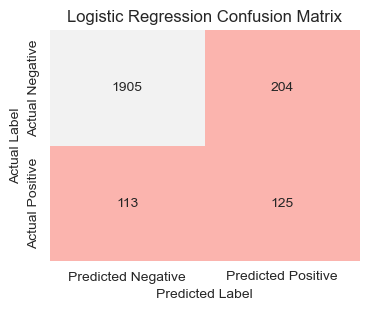

In [62]:
y_predict_lr_ = lr_.predict(x_test)

# accuracy score
lr_accuracy = accuracy_score(y_test,y_predict_lr_)
print('Logistic Regression Accuracy score is :',lr_accuracy)

print('_'*100)

## ROC AUC Score
lr_roc = roc_auc_score(y_test,y_predict_lr_)
print("Logistic Regression roc_auc_score :", lr_roc)

print('_'*100)

#Classification Report
lr_classification_report = classification_report(y_test,y_predict_lr_)

print('_'*100)
print('Logistic Regression Classification Report: \n\n', classification_report(y_test,y_predict_lr_))

# confusion matrix
lr_confusion = confusion_matrix(y_test,y_predict_lr_)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(lr_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

###  Model_2_Decision Tree Classifier



In [63]:
dc_tree = DecisionTreeClassifier()
dc_tree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier()

Decision Tree Classifier Accuracy score is : 0.7128248828291436
____________________________________________________________________________________________________
Decision Tree Classifier  roc_auc_score : 0.655696275665316
____________________________________________________________________________________________________
Decision Tree Classifier Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.73      0.82      2109
           1       0.19      0.58      0.29       238

    accuracy                           0.71      2347
   macro avg       0.57      0.66      0.56      2347
weighted avg       0.86      0.71      0.77      2347

____________________________________________________________________________________________________
____________________________________________________________________________________________________


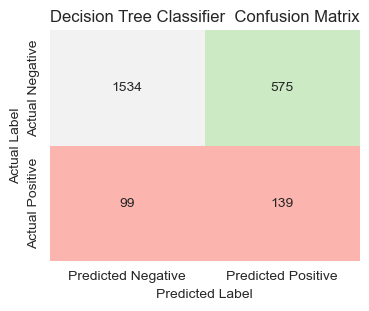

In [64]:
y_predict_dc_tree = dc_tree.predict(x_test)

# accuracy score
dc_accuracy_score = accuracy_score(y_test,y_predict_dc_tree)
print('Decision Tree Classifier Accuracy score is :',dc_accuracy_score)

print('_'*100)

## ROC AUC Score
dc_roc = roc_auc_score(y_test,y_predict_dc_tree)
print("Decision Tree Classifier  roc_auc_score :", dc_roc)

print('_'*100)

print('Decision Tree Classifier Classification Report: \n\n', classification_report(y_test,y_predict_dc_tree))

print('_'*100)

# confusion matrix
dc_confusion = confusion_matrix(y_test,y_predict_dc_tree)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(dc_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Decision Tree Classifier  Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Model 3 _ Random Forest Classifier

In [65]:
rf_ = RandomForestClassifier()
rf_.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier()

Random Forest Classifier Accuracy score is : 0.8662121857690669
____________________________________________________________________________________________________
Random Forest Classifier  roc_auc_score : 0.7112246036394643
____________________________________________________________________________________________________
Random Forest Classifier Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.91      0.92      2109
           1       0.38      0.52      0.44       238

    accuracy                           0.87      2347
   macro avg       0.66      0.71      0.68      2347
weighted avg       0.89      0.87      0.87      2347

____________________________________________________________________________________________________
____________________________________________________________________________________________________


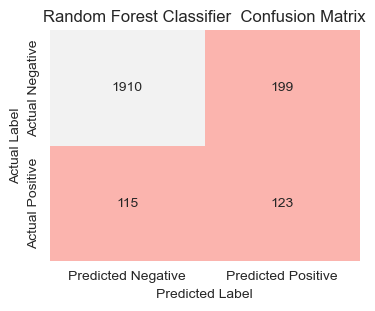

In [66]:
y_predict_rf_= rf_.predict(x_test)

# accuracy score
rf_accuracy_score = accuracy_score(y_test,y_predict_rf_)
print('Random Forest Classifier Accuracy score is :',rf_accuracy_score)

print('_'*100)

## ROC AUC Score
rf_roc = roc_auc_score(y_test,y_predict_rf_)
print("Random Forest Classifier  roc_auc_score :", rf_roc)

print('_'*100)

print('Random Forest Classifier Classification Report: \n\n', classification_report(y_test,y_predict_rf_))

print('_'*100)

# confusion matrix
rf_confusion = confusion_matrix(y_test,y_predict_rf_)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(rf_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Random Forest Classifier  Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [67]:
GB_ = GradientBoostingClassifier()
GB_.fit(x_train_resampled,y_train_resampled)

GradientBoostingClassifier()

GradientBoostingClassifier Accuracy score : 0.8691947166595654
____________________________________________________________________________________________________
GradientBoostingClassifier  roc_auc_score : 0.7240667248407185
____________________________________________________________________________________________________
GradientBoostingClassifier Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2109
           1       0.39      0.54      0.46       238

    accuracy                           0.87      2347
   macro avg       0.67      0.72      0.69      2347
weighted avg       0.89      0.87      0.88      2347

____________________________________________________________________________________________________
____________________________________________________________________________________________________
[[1911  198]
 [ 109  129]]


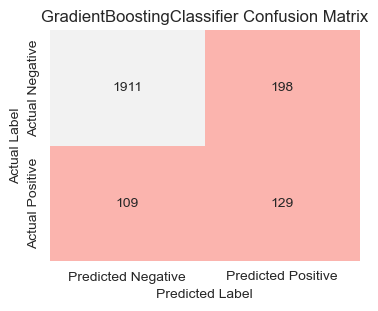

In [68]:
y_predict_GB_ = GB_.predict(x_test)

# Accuracy score
GB_accuracy_score = accuracy_score(y_test,y_predict_GB_)
print("GradientBoostingClassifier Accuracy score :" ,GB_accuracy_score)
print('_'*100)

## ROC AUC Score
GB_roc = roc_auc_score(y_test,y_predict_GB_)
print("GradientBoostingClassifier  roc_auc_score :", GB_roc)

print('_'*100)

print('GradientBoostingClassifier Classification Report: \n\n', classification_report(y_test,y_predict_GB_))

print('_'*100)

# confusion matrix
GB_confusion = confusion_matrix(y_test,y_predict_GB_)
print('_'*100)
print(GB_confusion)

# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(GB_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('GradientBoostingClassifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Model 4_Support vector Machine

In [69]:
svc_ = SVC()
svc_.fit(x_train_resampled,y_train_resampled)

SVC()

SVM Classifier Accuracy score : 0.861951427354069
____________________________________________________________________________________________________
SVM Classifier  roc_auc_score : 0.7107175729466751
____________________________________________________________________________________________________
SVM Classifier Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.90      0.92      2109
           1       0.37      0.52      0.43       238

    accuracy                           0.86      2347
   macro avg       0.66      0.71      0.68      2347
weighted avg       0.89      0.86      0.87      2347

____________________________________________________________________________________________________
____________________________________________________________________________________________________


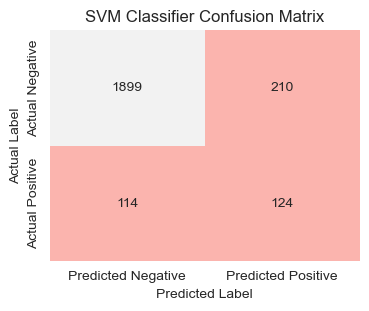

In [70]:
y_predict_svc_ = svc_.predict(x_test)


# Accuracy score
svc_accuracy_score = accuracy_score(y_test,y_predict_svc_)
print("SVM Classifier Accuracy score :" ,svc_accuracy_score)
print('_'*100)

## ROC AUC Score
svc_roc = roc_auc_score(y_test,y_predict_svc_)
print("SVM Classifier  roc_auc_score :", svc_roc)

print('_'*100)

print('SVM Classifier Classification Report: \n\n', classification_report(y_test,y_predict_svc_))

print('_'*100)

# confusion matrix
svc_confusion = confusion_matrix(y_test,y_predict_svc_)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(svc_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('SVM Classifier Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### K_Nearest neibhours

In [71]:
knn_ = KNeighborsClassifier()
knn_.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier()

KNeighborsClassifier Accuracy score : 0.8052833404345974
____________________________________________________________________________________________________
KNeighborsClassifier  roc_auc_score : 0.6568209075949015
____________________________________________________________________________________________________
KNeighborsClassifier r Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.84      0.89      2109
           1       0.25      0.47      0.33       238

    accuracy                           0.81      2347
   macro avg       0.59      0.66      0.61      2347
weighted avg       0.86      0.81      0.83      2347

____________________________________________________________________________________________________
____________________________________________________________________________________________________


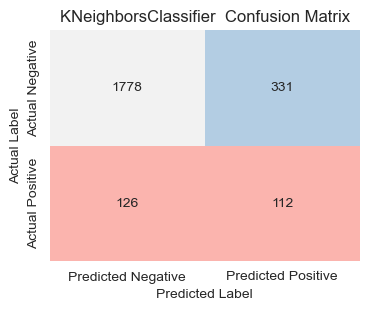

In [72]:
y_predict_knn_ = knn_.predict(x_test)


# Accuracy score
knn_accuracy_score = accuracy_score(y_test,y_predict_knn_ )
print("KNeighborsClassifier Accuracy score :" ,knn_accuracy_score)
print('_'*100)

## ROC AUC Score
knn_roc = roc_auc_score(y_test,y_predict_knn_ )
print("KNeighborsClassifier  roc_auc_score :", knn_roc)

print('_'*100)

print('KNeighborsClassifier r Classification Report: \n\n', classification_report(y_test,y_predict_knn_ ))

print('_'*100)

# confusion matrix
knn_confusion = confusion_matrix(y_test,y_predict_knn_ )
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(knn_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('KNeighborsClassifier  Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [73]:
xg_boost = XGBClassifier()
xg_boost.fit(x_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

xg_boost Accuracy score : 0.8470387729015765
____________________________________________________________________________________________________
xg_boost  roc_auc_score : 0.7080110849460695
____________________________________________________________________________________________________
xg_boost Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.88      0.91      2109
           1       0.34      0.53      0.41       238

    accuracy                           0.85      2347
   macro avg       0.64      0.71      0.66      2347
weighted avg       0.88      0.85      0.86      2347

____________________________________________________________________________________________________
____________________________________________________________________________________________________


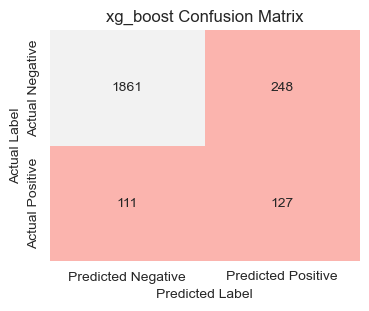

In [74]:
y_predict_xg_ = xg_boost.predict(x_test)


# Accuracy score
xg_accuracy_score = accuracy_score(y_test,y_predict_xg_ )
print("xg_boost Accuracy score :" ,xg_accuracy_score)
print('_'*100)

## ROC AUC Score
xg_roc = roc_auc_score(y_test,y_predict_xg_ )
print("xg_boost  roc_auc_score :", xg_roc)

print('_'*100)

print('xg_boost Classification Report: \n\n', classification_report(y_test,y_predict_xg_ ))

print('_'*100)

# confusion matrix
xg_confusion = confusion_matrix(y_test,y_predict_xg_ )
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(xg_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('xg_boost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [75]:
NN_ = MLPClassifier()
NN_.fit(x_train_resampled,y_train_resampled)

MLPClassifier()

Neural network Accuracy score : 0.8406476352790797
____________________________________________________________________________________________________
Neural network  roc_auc_score : 0.7044548971793553
____________________________________________________________________________________________________
Neural network Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.88      0.91      2109
           1       0.33      0.53      0.40       238

    accuracy                           0.84      2347
   macro avg       0.63      0.70      0.66      2347
weighted avg       0.88      0.84      0.86      2347

____________________________________________________________________________________________________
[[1846  263]
 [ 111  127]]
____________________________________________________________________________________________________


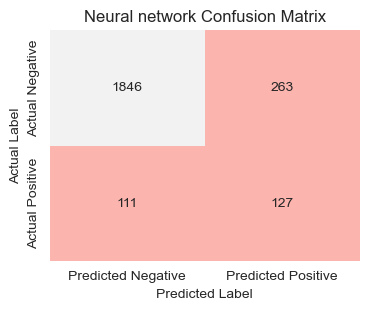

In [76]:
y_predict_NN_ = NN_.predict(x_test)
# Accuracy score
NN_accuracy_score = accuracy_score(y_test,y_predict_NN_ )
print("Neural network Accuracy score :" ,NN_accuracy_score)
print('_'*100)

## ROC AUC Score
NN_roc = roc_auc_score(y_test,y_predict_NN_ )
print("Neural network  roc_auc_score :",NN_roc)

print('_'*100)

print('Neural network Classification Report: \n\n', classification_report(y_test,y_predict_NN_ ))

print('_'*100)

# confusion matrix
NN_confusion = confusion_matrix(y_test,y_predict_NN_ )
print(NN_confusion)
print('_'*100)


# Plotting the confusion matrix heatmap
plt.figure(figsize=(4,3))
sns.heatmap(NN_confusion, annot=True, fmt='g', cmap='Pastel1', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Neural network Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [77]:
## List of tuples containing (model, accuracy)
model_accuracy_list= [('Logistic_regression', lr_accuracy,lr_roc),
         ('Desicion Tree Classifier', dc_accuracy_score,dc_roc),
         ('Random Forest Classifier', rf_accuracy_score,dc_roc),
         ('Gradient Boosting Classifier', GB_accuracy_score,GB_roc),
         ('Support Vector Classifier', svc_accuracy_score,svc_roc),
          ('KNeighbours Classifier', knn_accuracy_score,knn_roc),
          ('XG Boosting Classifier', xg_accuracy_score,xg_roc),
                     ('Neural Networking Classifier',NN_accuracy_score,NN_roc)]

model_accuracy_list

[('Logistic_regression', 0.8649339582445675, 0.7142408883894952),
 ('Desicion Tree Classifier', 0.7128248828291436, 0.655696275665316),
 ('Random Forest Classifier', 0.8662121857690669, 0.655696275665316),
 ('Gradient Boosting Classifier', 0.8691947166595654, 0.7240667248407185),
 ('Support Vector Classifier', 0.861951427354069, 0.7107175729466751),
 ('KNeighbours Classifier', 0.8052833404345974, 0.6568209075949015),
 ('XG Boosting Classifier', 0.8470387729015765, 0.7080110849460695),
 ('Neural Networking Classifier', 0.8406476352790797, 0.7044548971793553)]

In [78]:
## Threshold for minimum accuracy 
min_accuracy_threshold = 0.75

best_model = None
best_accuracy = 0.0

## Find the best model with the highest accuracy
for model, accuracy, roc_score in model_accuracy_list:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_roc = roc_score

## Best Model Display
if best_model is not None:
    print("Best Model:", best_model)
    print('-'*50)
    print("Validation Accuracy of the Best Model:", best_accuracy)
    print('-'*50)
    print('ROC AUC Score of the Best Model:', best_roc)
else:
    print("No model met the accuracy threshold.")

Best Model: Gradient Boosting Classifier
--------------------------------------------------
Validation Accuracy of the Best Model: 0.8691947166595654
--------------------------------------------------
ROC AUC Score of the Best Model: 0.7240667248407185


### Hyper Parameter tuning

## Tuning_ RandomSearchCV

In [79]:
gb_classifier = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=gb_classifier,
    param_distributions=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

In [80]:
# Fit the model to the data
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.6, 0.7, 0.8, 0.9]},
                   random_state=42, scoring='accuracy', verbose=1)

In [81]:
# Get the best parameters and best estimator
best_params = random_search.best_params_
print("Best Hyperparameters:\n\n", best_params)
print('\n')
best_estimator = random_search.best_estimator_
print('Best Model :\n\n' , best_estimator)

Best Hyperparameters:

 {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_depth': 3, 'learning_rate': 0.01}


Best Model :

 GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=6,
                           min_samples_split=10, n_estimators=200,
                           subsample=0.6)


Accuracy of Best Model : 0.8691947166595654
--------------------------------------------------
ROC AUC Score of Best Model: 0.7240667248407185
--------------------------------------------------

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2109
           1       0.39      0.54      0.46       238

    accuracy                           0.87      2347
   macro avg       0.67      0.72      0.69      2347
weighted avg       0.89      0.87      0.88      2347

--------------------------------------------------
[[1911  198]
 [ 109  129]]


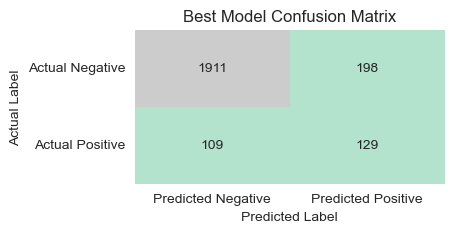

In [82]:
# Make predictions on the test set
y_pred = best_estimator.predict(x_test)

# Evaluate the best model

## Accuracy Score
accuracy = accuracy_score(y_test, y_predict_GB_)
print("Accuracy of Best Model :", accuracy)
print('-'*50)

## ROC AUC Score
roc_auc = roc_auc_score(y_test, y_predict_GB_)
print("ROC AUC Score of Best Model:", roc_auc)
print('-'*50)

## CLassification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_predict_GB_))
print('-'*50)

## Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict_GB_)

print(conf_matrix)
# Plotting the confusion matrix heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Pastel2', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Best Model Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

### Conclusion:

The model's performance has improved after hyperparameter tuning. The accuracy, ROC AUC score, and other classification metrics have shown improvements. The confusion matrix indicates a better balance between true positives, true negatives, false positives, and false negatives after the tuning process. This suggests that the hyperparameter tuning process has led to a more effective Gradient Boosting Classifier for task.

In [83]:
# Create a KFold object
kf = KFold(shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(best_estimator, x_train, y_train, cv=kf, scoring='accuracy')

# Print the results
print("Cross-Validation Results:", cv_results)
print("Average Accuracy:", cv_results.mean())

Cross-Validation Results: [0.74022346 0.77094972 0.78212291 0.81512605 0.76190476]
Average Accuracy: 0.7740653803420809


# Hyperparameter tuning and cross-validation results:
The best estimator achieved an accuracy of approximately 86.91%, which is consistent with the cross-validation Average accuracy of 77.40 %. This suggests that the chosen hyperparameters provide a stable and reliable model with minimal variance across different folds.

### Feature Importance

In [85]:
# Extract feature anmes 
Feature_importance  = best_estimator.feature_importances_

In [86]:
# Display the feature importance in DataFrame
Feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance':Feature_importance})

In [87]:
# set up the Dataframe values in ascending order
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=True)

In [88]:
# Display the Feature importance.
Feature_importance

,Feature,Importance
5,housing,0.001659
12,previous,0.002705
2,marital,0.003309
6,loan,0.003659
20,pastEmail,0.003951
4,default,0.005257
9,day_of_week,0.008384
1,profession,0.008731
7,contact,0.009596
10,campaign,0.012252


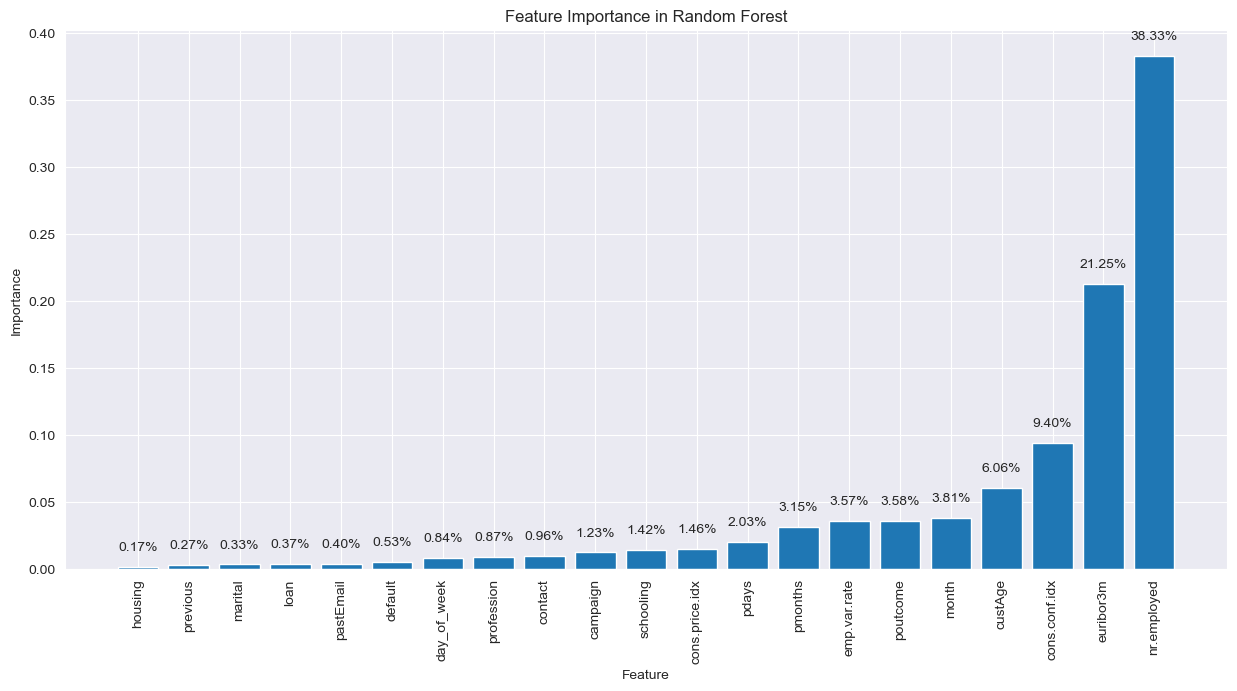

In [89]:
total = sum(Feature_importance['Importance'])
percentages = [(value / total) * 100 for value in Feature_importance['Importance']]

plt.figure(figsize=(15, 7))
bars = plt.bar(Feature_importance['Feature'], Feature_importance['Importance'],)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.xticks(rotation=90)

# Add percentage values on top of each bar
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()


---

<span style="color:black">

<span style="color:black">

**Feature importances indicate the contribution of each feature to the model's predictions. A higher importance value suggests a stronger influence on the model's decision-making.**

- Features with the highest importance:
    
    - nr.employed (38.33 %)
    - euribor3m	(21.25%)
    - cons.conf.idx	(9,40 %)
    
    
 
   These features significantly impact the model, indicating that economic factors play a crucial role in predicting the outcome.

</span>

---



<span style="color:blue">

<span style="color:Blue">

#  Predict on Unseen Data( Test Data)
    
 </span>
   

In [98]:
# Load the Test data

test_data = pd.read_excel('test.xlsx')

test_data

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,...,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,...,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,...,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,...,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,...,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,NaN,technician,married,professional.course,no,yes,no,telephone,may,NaN,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,32946
32946,32.0,blue-collar,married,NaN,no,no,yes,cellular,may,thu,...,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,999.0,0,32947
32947,32.0,services,married,high.school,no,no,no,cellular,may,mon,...,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,999.0,0,32948
32948,32.0,blue-collar,married,basic.9y,no,yes,no,telephone,jun,wed,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0,32949


In [99]:
# dropping ID column
test_data.drop(['id'],axis=1,inplace=True)

In [100]:
# Display the columns and rows of the test dataset
test_data.shape

(32950, 21)

### •	Handle missing values

In [101]:
# Display the null values.
test_data.isnull().sum()

custAge           8042
profession           0
marital              0
schooling         9770
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week       3328
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
dtype: int64

<Axes: >

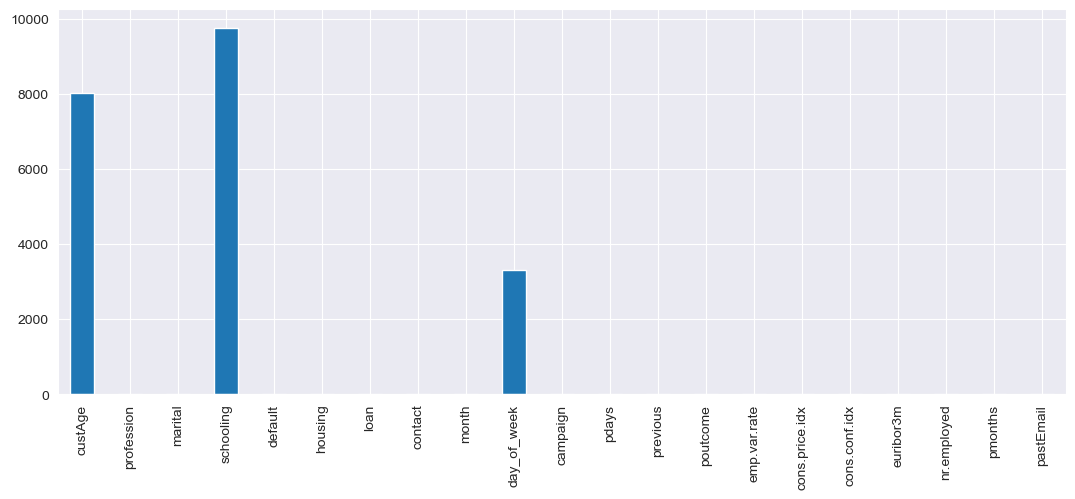

In [102]:
# Plot test dataset null values.
test_data.isnull().sum().plot(kind='bar')

In [103]:
# lets impute the null value with 'bfill', as we performed the method in train data

test_data['custAge'].fillna(method='bfill', inplace=True)  
test_data['schooling'].fillna(method='bfill',inplace = True)
test_data['day_of_week'].fillna(method='bfill',inplace = True)

In [104]:
# Replace 999 with -1
## Replacing '999' with -1 as 999 can be considered as outlier and effect the analyis, as we performed this in train data
test_data['pdays'] =test_data['pdays'].replace(999, -1)
test_data['pmonths'] =test_data['pmonths'].replace(999, -1)

## •	Separate categorical and numerical features

In [105]:
# separate the categorical and numerical variables from test dataset.
numerical = []
categorical = []

for i in test_data.columns:
    if test_data[i].dtypes == 'object':
        categorical.append(i)
    else:
        numerical.append(i)

In [106]:
numerical,categorical

(['custAge',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'pmonths',
  'pastEmail'],
 ['profession',
  'marital',
  'schooling',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'])

### •	Encode categorical data

In [107]:
# Run the for loop to encode the categorical data
for col in categorical:
    test_data[col] = label_encoder.fit_transform(test_data[col])

In [108]:
# Display categorical Variable.
test_data[categorical]

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,poutcome
0,0,1,3,0,0,2,0,9,4,0
1,7,1,3,0,0,0,0,9,3,2
2,1,1,5,1,2,0,0,6,2,0
3,0,2,6,0,0,0,0,1,4,1
4,7,0,3,0,2,0,0,7,3,1
...,...,...,...,...,...,...,...,...,...,...
32945,9,1,5,0,2,0,1,6,2,1
32946,1,1,3,0,0,2,0,6,2,1
32947,7,1,3,0,0,0,0,6,1,1
32948,1,1,2,0,2,0,1,4,4,1


In [109]:
# Perform standardscaler on Numerical variables
test_data[numerical] = sc_x.fit_transform(test_data[numerical])

In [110]:
# Display dataset after encoding and scaling.
test_data

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,-0.484567,0,1,3,0,0,2,0,9,4,...,-0.169961,1.693246,0,-0.755891,1.074830,0.645487,-1.583998,-2.825567,-0.193214,1.330814
1,-0.484567,7,1,3,0,0,0,0,9,3,...,2.510216,1.693246,2,-2.219000,-2.069343,2.311247,-1.640572,-2.078278,4.678026,1.330814
2,0.954296,1,1,5,1,2,0,0,6,2,...,-0.169961,1.693246,0,-1.201185,-1.181373,-1.236606,-1.329416,-0.946948,-0.193214,1.330814
3,-0.964189,0,2,6,0,0,0,0,1,4,...,-0.169961,-0.347892,1,0.834444,-0.229484,0.948352,0.770165,0.841553,-0.193214,-0.274249
4,-0.100870,7,0,3,0,2,0,0,7,3,...,-0.169961,-0.347892,1,-0.119757,-0.651010,-0.328009,0.301988,0.393735,-0.193214,-0.274249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,-0.772340,9,1,5,0,2,0,1,6,2,...,-0.169961,-0.347892,1,0.643604,0.720679,0.883453,0.708395,0.327186,-0.193214,-0.274249
32946,-0.772340,1,1,3,0,0,2,0,6,2,...,-0.169961,-0.347892,1,-1.201185,-1.181373,-1.236606,-1.364630,-0.946948,-0.193214,-0.274249
32947,-0.772340,7,1,3,0,0,0,0,6,1,...,-0.169961,-0.347892,1,-1.201185,-1.181373,-1.236606,-1.345580,-0.946948,-0.193214,-0.274249
32948,-0.772340,1,1,2,0,2,0,1,4,4,...,-0.169961,-0.347892,1,0.834444,1.534363,-0.284743,0.767278,0.841553,-0.193214,-0.274249


### Using best model to predict on test data

In [111]:
# predict the model on test data
testdata_pred = best_estimator.predict(test_data)

In [112]:
# Lets add new Column 
test_data['Marketing'] = testdata_pred

test_data['Marketing'].value_counts()

Marketing
0    28691
1     4259
Name: count, dtype: int64

In [113]:
#Display the values
test_data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,Marketing
0,-0.484567,0,1,3,0,0,2,0,9,4,...,1.693246,0,-0.755891,1.074830,0.645487,-1.583998,-2.825567,-0.193214,1.330814,1
1,-0.484567,7,1,3,0,0,0,0,9,3,...,1.693246,2,-2.219000,-2.069343,2.311247,-1.640572,-2.078278,4.678026,1.330814,1
2,0.954296,1,1,5,1,2,0,0,6,2,...,1.693246,0,-1.201185,-1.181373,-1.236606,-1.329416,-0.946948,-0.193214,1.330814,0
3,-0.964189,0,2,6,0,0,0,0,1,4,...,-0.347892,1,0.834444,-0.229484,0.948352,0.770165,0.841553,-0.193214,-0.274249,0
4,-0.100870,7,0,3,0,2,0,0,7,3,...,-0.347892,1,-0.119757,-0.651010,-0.328009,0.301988,0.393735,-0.193214,-0.274249,0


In [114]:
## Read the test dataset set again to cross validate the responded customers.
candidate = pd.read_excel('test.xlsx')

candidate.shape

(32950, 22)

In [115]:
## Adding Decision Column to original Test data
candidate['MarketingDecision'] = testdata_pred

## GEtting customers count for marketing decision 1
candidate[candidate['MarketingDecision']==1].shape

(4259, 23)

In [116]:
## Creating new dataframe with potential customers list
customers_list = candidate[candidate['MarketingDecision']==1]

In [117]:
## Exporting to Excel file
customers_list.to_excel('marketing_list.xlsx', index=False)

In [118]:
## List of Potential Customers
customers_list

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id,MarketingDecision
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,...,failure,-1.1,94.199,-37.5,0.886,4963.6,999.000000,2,1,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,...,success,-3.4,92.379,-29.8,0.788,5017.5,0.100000,2,2,1
16,NaN,entrepreneur,unknown,NaN,no,no,no,cellular,oct,thu,...,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,999.000000,0,17,1
31,63.0,technician,married,unknown,no,no,no,cellular,aug,tue,...,failure,-2.9,92.201,-31.4,0.838,5076.2,999.000000,2,32,1
32,NaN,admin.,single,high.school,no,yes,no,cellular,apr,wed,...,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,999.000000,0,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32924,52.0,management,married,high.school,no,yes,yes,cellular,aug,tue,...,failure,-2.9,92.201,-31.4,0.883,5076.2,0.333333,4,32925,1
32932,50.0,blue-collar,divorced,professional.course,no,yes,no,cellular,nov,mon,...,nonexistent,-1.1,94.767,-50.8,1.050,4963.6,999.000000,0,32933,1
32933,NaN,entrepreneur,married,university.degree,no,no,no,cellular,sep,NaN,...,success,-1.1,94.199,-37.5,0.882,4963.6,0.100000,2,32934,1
32940,32.0,blue-collar,married,NaN,no,yes,no,telephone,jun,NaN,...,failure,-1.7,94.055,-39.8,0.761,4991.6,999.000000,4,32941,1
